In [1]:
import pandas as pd  #Data Analysis and structure library 
import csv           #Implements classes to read and write tabular data in csv format
import numpy as np   #Scientific Library
import scipy as sp   #Scientific and technical Computing library
import seaborn as sns#Data visualization library
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf # This import allows us to use R-style function (y ~ x; x predicts y)
import matplotlib.pyplot as plt #2D plotting library
plt.style.use('ggplot')#Plotting system to make plots look professional.Shows the graphs in line
%matplotlib inline  
import plotly as py  #Data analysis and graphing tool
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #Plotly can work online or offline on jupyter notebook
init_notebook_mode(connected=True) #Initiate Plotly to plot graphs offline

In [2]:
filename = "NewYork_RentalSales.csv"
#https://public.enigma.com/datasets/new-york-city-property-sales/fd6efa37-2dcd-4294-8795-a0e6044f15b4

#Load dataset
#By opening the csv file in this format using pandas all the empty values become NaN.
df = pd.read_csv(filename, index_col=None) 
#The first and the last two columns have been elimiated
df.head(10)
#Filling all the missing values with 0
df = df.fillna(0)

In [3]:
print("Data Dimensions are: ", df.shape, '\n')
#Summary of thr dataframe
df.info()
#Detect any missing value
df.isnull().sum()

Data Dimensions are:  (60295, 62) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 62 columns):
borough_code                                      60295 non-null int64
borough_code_definition                           60295 non-null object
neighborhood                                      60295 non-null object
building_class_category_code                      60295 non-null object
building_class_category_code_definition           60295 non-null object
tax_class_at_present_code                         60295 non-null object
tax_class_at_present_code_definition              60295 non-null object
building_class_at_present_code                    60295 non-null object
building_class_at_present_code_definition         60295 non-null object
address                                           60295 non-null object
apartment_number                                  60295 non-null object
zipcode                                           60295 non-null

borough_code                                      0
borough_code_definition                           0
neighborhood                                      0
building_class_category_code                      0
building_class_category_code_definition           0
tax_class_at_present_code                         0
tax_class_at_present_code_definition              0
building_class_at_present_code                    0
building_class_at_present_code_definition         0
address                                           0
apartment_number                                  0
zipcode                                           0
residential_units                                 0
commercial_units                                  0
total_units                                       0
land_square_feet                                  0
gross_square_feet                                 0
year_built                                        0
tax_class_at_time_of_sale_code                    0
tax_class_at

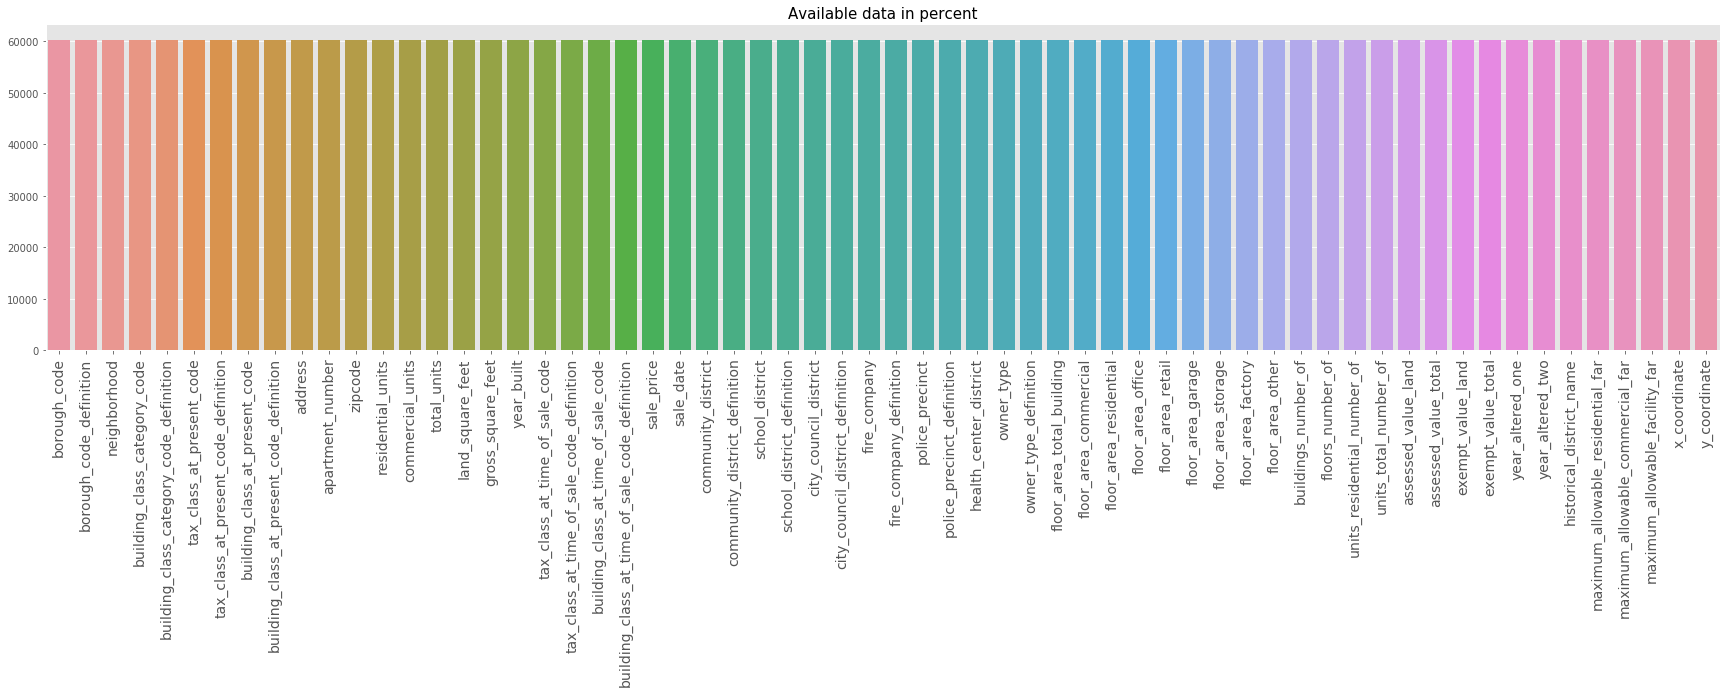

In [4]:
#Capture necessary columns
variables=df.columns
count=[]
for variable in variables:
    length=df[variable].count()
    count.append(length)
#Plot number of available data per variable
plt.figure(figsize=(30,6))
sns.barplot(x=variables, y=count)
plt.xticks(rotation = 90, fontsize=14)
plt.title('Available data in percent', fontsize=15)
plt.savefig('100',dpi=300, bbox_inches = 'tight')
plt.show()
#20% of sales price data is null and have been replaced by zeroes.

In [5]:
# Remove observations with missing SALE PRICE
#df = df[df.sale_price.notnull()]
len(df)

60295

In [6]:
df.describe()

,borough_code,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale_code,sale_price,...,assessed_value_total,exempt_value_land,exempt_value_total,year_altered_one,year_altered_two,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate
count,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,6.029500e+04,6.029500e+04,60295.000000,60295.000000,6.029500e+04,...,6.029500e+04,6.029500e+04,6.029500e+04,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,6.029500e+04,60295.000000
mean,3.125682,10892.267700,2.113641,0.136695,2.285928,2.780420e+03,2.747318e+03,1823.984360,1.557741,1.097608e+06,...,5.320684e+06,1.192148e+05,1.047516e+06,254.444780,35.836023,2.427201,0.860708,3.310758,9.580913e+05,185950.861431
std,1.237895,568.654447,9.679747,1.651642,9.847324,1.972930e+04,2.141574e+04,481.188253,0.842635,1.091435e+07,...,1.872961e+07,1.390624e+06,6.838430e+06,666.016151,265.733650,2.715200,2.611799,2.907397,2.089340e+05,49412.661533
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.000000,10312.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,1.000000,0.000000e+00,...,2.370850e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,0.000000,1.000000,9.862190e+05,168367.000000
50%,3.000000,11213.000000,1.000000,0.000000,1.000000,2.000000e+03,1.419000e+03,1935.000000,1.000000,4.820000e+05,...,3.571600e+04,0.000000e+00,1.550000e+03,0.000000,0.000000,1.250000,0.000000,2.000000,9.992490e+05,192164.000000
75%,4.000000,11356.000000,2.000000,0.000000,2.000000,3.000000e+03,2.300000e+03,1975.000000,2.000000,9.000000e+05,...,9.468245e+05,5.690000e+03,1.628650e+04,0.000000,0.000000,3.000000,0.000000,4.800000,1.023268e+06,214224.000000
max,5.000000,11697.000000,917.000000,184.000000,917.000000,3.014056e+06,2.224200e+06,2017.000000,4.000000,2.210000e+09,...,5.007303e+08,1.687136e+08,4.033876e+08,2017.000000,2016.000000,12.000000,15.000000,15.000000,1.067141e+06,271831.000000


In [7]:
#skewness and kurtosis`
print("Skewness:%f"% df.sale_price.skew())
print("Kurtosis %f" % df.sale_price.kurt())

Skewness:146.862960
Kurtosis 28235.649789


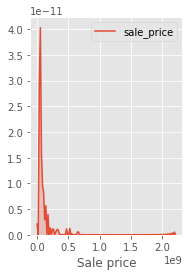

In [8]:
plt.subplot(121)
sns.kdeplot(df.sale_price,shade=True)
plt.xlabel('Sale price')
plt.savefig('19',dpi=300, bbox_inches = 'tight')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



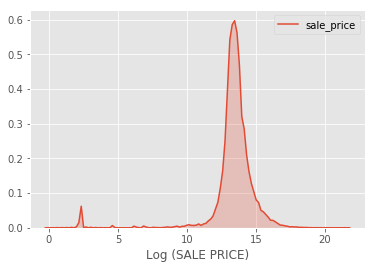

In [9]:
x = np.log(df.sale_price)
sns.kdeplot(x,shade= True)
plt.xlabel('Log (SALE PRICE)')
plt.savefig('20',dpi=300, bbox_inches = 'tight')

In [10]:
df.sale_price.mode()

0    0.0
dtype: float64

In [11]:
table = pd.crosstab( df.borough_code_definition,df.sale_price,
                    margins=True )
table = table.sort_values(by='All', ascending=False)
table.drop('All', inplace=True)
table

sale_price,0.0,1.0,2.0,3.0,5.0,10.0,20.0,50.0,100.0,200.0,...,250867763.0,255000000.0,305000000.0,323176471.0,339400000.0,467500000.0,520000000.0,652000000.0,2210000000.0,All
borough_code_definition,,,,,,,,,,,,,,,,,,,,,
Brooklyn,6742,23,1,0,1,191,1,1,17,1,...,0,0,0,0,0,0,0,0,0,18966
Queens,6146,22,0,2,0,173,1,0,21,0,...,0,0,0,0,0,0,0,0,0,18841
Manhattan,2617,14,1,0,1,56,0,0,1,0,...,1,1,1,1,1,1,1,1,1,10198
Staten Island,2008,2,0,0,0,96,0,0,9,0,...,0,0,0,0,0,0,0,0,0,7141
Bronx,1402,15,1,0,0,65,0,0,6,0,...,0,0,0,0,0,0,0,0,0,5149


In [12]:
A = df.loc[df['borough_code_definition'] == 'Brooklyn']
A.describe()

,borough_code,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale_code,sale_price,...,assessed_value_total,exempt_value_land,exempt_value_total,year_altered_one,year_altered_two,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate
count,18966.0,18966.000000,18966.000000,18966.000000,18966.000000,18966.000000,1.896600e+04,18966.000000,18966.000000,1.896600e+04,...,1.896600e+04,1.896600e+04,1.896600e+04,18966.000000,18966.000000,18966.000000,18966.000000,18966.000000,1.896600e+04,18966.000000
mean,3.0,11219.498840,2.129126,0.145049,2.319466,2111.014131,2.619814e+03,1808.104661,1.595487,8.437651e+05,...,1.593520e+06,8.364394e+04,9.626074e+05,254.799483,35.267215,2.015101,0.323843,2.977740,9.480097e+05,168416.186755
std,0.0,115.862228,8.483643,1.642758,8.647472,8794.752206,1.584138e+04,496.230742,0.890308,2.875448e+06,...,8.561403e+06,1.350746e+06,6.687384e+06,667.391215,263.817973,1.438177,1.358261,1.658171,2.138250e+05,40485.511454
min,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.0,11210.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1910.000000,1.000000,0.000000e+00,...,2.338925e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,1.250000,0.000000,2.000000,9.875172e+05,163583.750000
50%,3.0,11220.000000,1.000000,0.000000,2.000000,1940.000000,1.756000e+03,1927.000000,1.000000,5.158335e+05,...,3.618700e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.000000,2.000000,9.957190e+05,175321.500000
75%,3.0,11231.000000,2.000000,0.000000,2.000000,2500.000000,2.745000e+03,1960.000000,2.000000,9.975000e+05,...,2.686500e+05,3.380000e+03,9.553000e+03,0.000000,0.000000,2.430000,0.000000,4.800000,1.002326e+06,187704.000000
max,3.0,11249.000000,889.000000,184.000000,889.000000,970000.000000,1.330743e+06,2017.000000,4.000000,1.710000e+08,...,4.033876e+08,8.640090e+07,4.033876e+08,2017.000000,2016.000000,10.000000,15.000000,15.000000,1.053618e+06,255352.000000


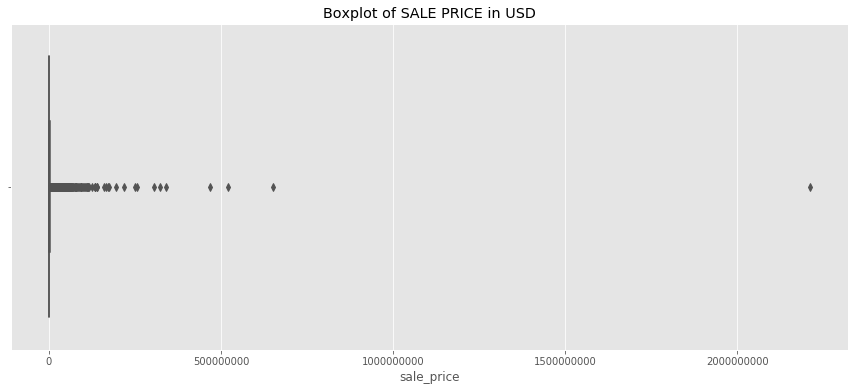

In [13]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='sale_price', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.savefig('21',dpi=300, bbox_inches = 'tight')
plt.show()

In [14]:
df.sale_price.median()

482000.0

In [15]:
sum(df.duplicated(df.columns))

0

In [16]:
df.borough_code_definition.value_counts()

Brooklyn         18966
Queens           18841
Manhattan        10198
Staten Island     7141
Bronx             5149
Name: borough_code_definition, dtype: int64

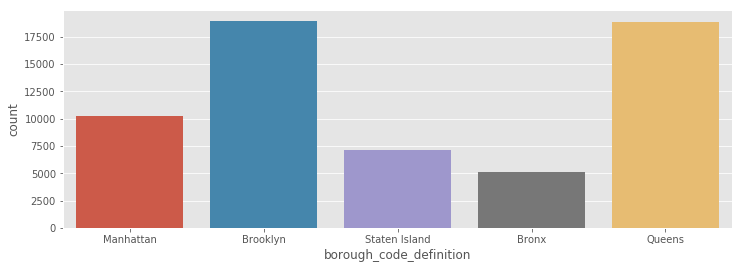

In [17]:
plt.figure(figsize=(12,4))
#Plot the data and configure the settings
sns.countplot(x='borough_code_definition',data=df)
plt.savefig('1',dpi=300, bbox_inches = 'tight')

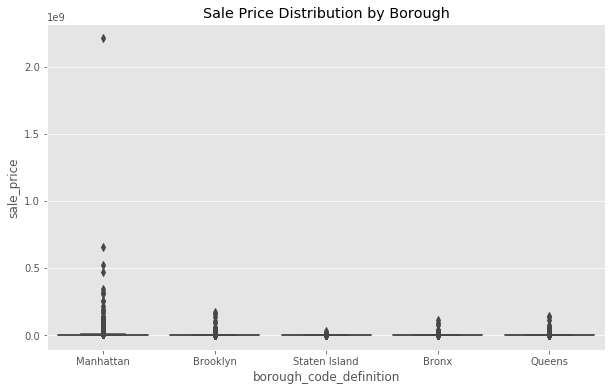

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='borough_code_definition', y='sale_price', data=df)
plt.title('Sale Price Distribution by Borough')
plt.savefig('18',dpi=300, bbox_inches = 'tight')
plt.show()

In [19]:
df.neighborhood.value_counts()

FLUSHING-NORTH               2522
BEDFORD STUYVESANT           1147
BOROUGH PARK                 1032
UPPER EAST SIDE (59-79)       941
UPPER WEST SIDE (59-79)       918
UPPER EAST SIDE (79-96)       888
ASTORIA                       841
EAST NEW YORK                 783
SHEEPSHEAD BAY                726
FLATBUSH-EAST                 710
GREAT KILLS                   705
BAYSIDE                       696
CROWN HEIGHTS                 691
RICHMOND HILL                 658
CANARSIE                      649
PARK SLOPE                    616
BUSHWICK                      592
BAY RIDGE                     585
ELMHURST                      563
MIDTOWN WEST                  559
UPPER WEST SIDE (79-96)       553
SUNSET PARK                   551
SO. JAMAICA-BAISLEY PARK      549
GRAVESEND                     548
MIDTOWN EAST                  548
LONG ISLAND CITY              547
JACKSON HEIGHTS               544
ST. ALBANS                    534
FLUSHING-SOUTH                532
HARLEM-CENTRAL

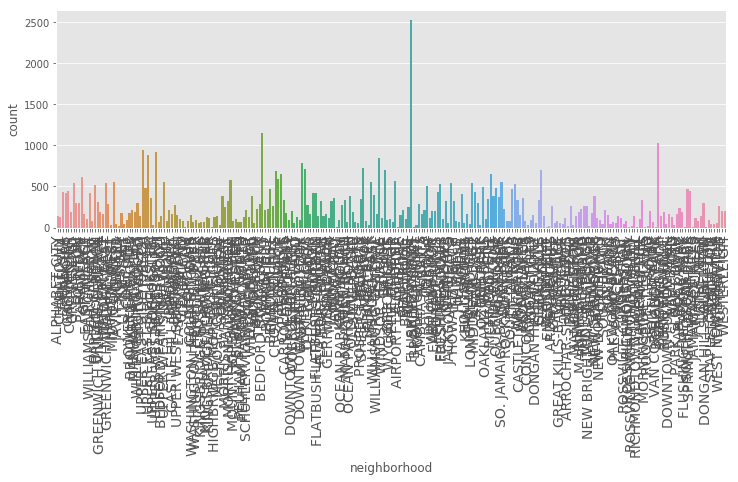

In [20]:
plt.figure(figsize=(12,4))
#Plot the data and configure the settings
sns.countplot(x='neighborhood',data=df)
plt.xticks(rotation = 90, fontsize=14)
plt.savefig('2',dpi=300, bbox_inches = 'tight')

In [21]:
df.building_class_at_present_code_definition.value_counts()

CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.                                                                                10884
TWO STORIES - DETACHED SM OR MID                                                                                          6150
ONE FAMILY ATTACHED OR SEMI-DETACHED                                                                                      5304
TWO FAMILY FRAME                                                                                                          4389
TWO FAMILY BRICK                                                                                                          4361
THREE FAMILIES                                                                                                            3842
TWO FAMILY CONVERTED FROM ONE FAMILY                                                                                      3322
ONE STORY - PERMANENT LIVING QUARTER                                                                           

In [22]:
#SALE DATE is object but should be datetime
df.sale_date = pd.to_datetime(df.sale_date , errors='coerce')
#Both TAX CLASS attributes should be categorical
df.tax_class_at_time_of_sale_code_definition = df.tax_class_at_time_of_sale_code_definition.astype('category')
df.tax_class_at_present_code_definition = df.tax_class_at_present_code_definition.astype('category')
df.zipcode = df.zipcode.astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 62 columns):
borough_code                                      60295 non-null int64
borough_code_definition                           60295 non-null object
neighborhood                                      60295 non-null object
building_class_category_code                      60295 non-null object
building_class_category_code_definition           60295 non-null object
tax_class_at_present_code                         60295 non-null object
tax_class_at_present_code_definition              60295 non-null category
building_class_at_present_code                    60295 non-null object
building_class_at_present_code_definition         60295 non-null object
address                                           60295 non-null object
apartment_number                                  60295 non-null object
zipcode                                           60295 non-null category
residential_units       

In [24]:
df.describe(include='all')

,borough_code,borough_code_definition,neighborhood,building_class_category_code,building_class_category_code_definition,tax_class_at_present_code,tax_class_at_present_code_definition,building_class_at_present_code,building_class_at_present_code_definition,address,...,exempt_value_land,exempt_value_total,year_altered_one,year_altered_two,historical_district_name,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate
count,60295.000000,60295,60295,60295,60295,60295,60295,60295,60295,60295,...,6.029500e+04,6.029500e+04,60295.000000,60295.000000,60295.0,60295.000000,60295.000000,60295.000000,6.029500e+04,60295.000000
unique,NaN,5,252,46,46,12,12,167,166,48025,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN
top,NaN,Brooklyn,FLUSHING-NORTH,1,ONE FAMILY DWELLINGS,1,Includes most residential property of up to th...,R4,CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.,131-03 40 ROAD,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,18966,2522,16613,16613,34780,34780,10884,10884,213,...,NaN,NaN,NaN,NaN,57201.0,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.125682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192148e+05,1.047516e+06,254.444780,35.836023,NaN,2.427201,0.860708,3.310758,9.580913e+05,185950.861431
std,1.237895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.390624e+06,6.838430e+06,666.016151,265.733650,NaN,2.715200,2.611799,2.907397,2.089340e+05,49412.661533
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.600000,0.000000,1.000000,9.862190e+05,168367.000000


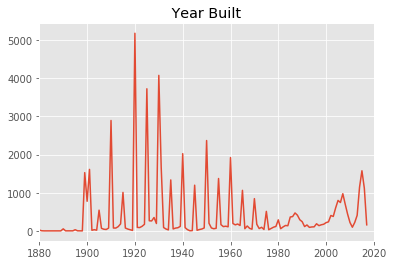

In [25]:
plt.title(r' Year Built ')
plt.xlim((1880,2020.10))
#plt.ylim((0,1000.10))
df['year_built'].value_counts().sort_index().plot.line()
plt.savefig('99',dpi=300, bbox_inches = 'tight')

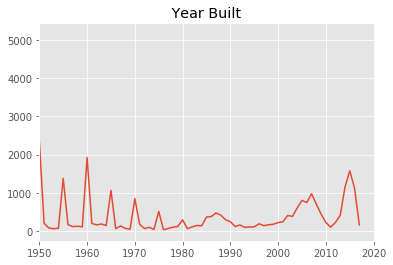

In [26]:
plt.title(r' Year Built ')
plt.xlim((1950,2020.10))
#plt.ylim((0,1000.10))
df['year_built'].value_counts().sort_index().plot.line()
plt.savefig('5',dpi=300, bbox_inches = 'tight')

In [27]:
df.year_built.mean()

1823.9843602288747

In [28]:
df.year_built.describe()

count    60295.000000
mean      1823.984360
std        481.188253
min          0.000000
25%       1920.000000
50%       1935.000000
75%       1975.000000
max       2017.000000
Name: year_built, dtype: float64

In [29]:
type(df.year_built)

pandas.core.series.Series

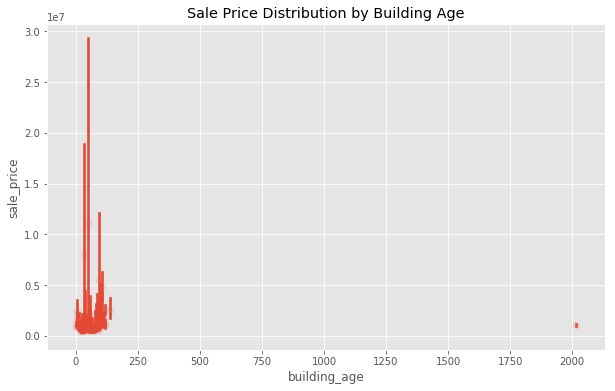

In [30]:
df['building_age'] = 2017 - df.year_built

plt.figure(figsize=(10,6))
sns.regplot(x='building_age', y='sale_price',x_bins=300, data=df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.savefig('5',dpi=300, bbox_inches = 'tight')
plt.show()

In [31]:
df.building_age.describe()

count    60295.000000
mean       193.015640
std        481.188253
min          0.000000
25%         42.000000
50%         82.000000
75%         97.000000
max       2017.000000
Name: building_age, dtype: float64

In [32]:
df.sale_price.median()

482000.0

In [33]:
#SALE DATE is object but should be datetime
df['sale_date']    = pd.to_datetime(df['sale_date'], errors='coerce')
df['sale_year']    = df['sale_date'].dt.year
df['sale_month']   = df['sale_date'].dt.month
df['sale_day']     = df['sale_date'].dt.day

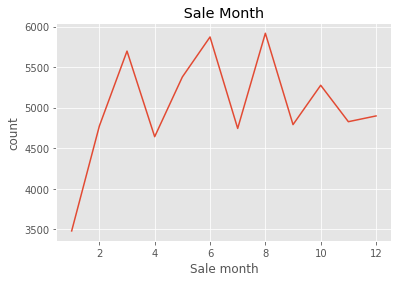

In [34]:
plt.title(r' Sale Month ')
plt.xlabel('Sale month')
plt.ylabel('count')
df['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('22',dpi=300, bbox_inches = 'tight')

In [35]:
df.sale_month.value_counts()

8     5917
6     5871
3     5697
5     5378
10    5276
12    4898
11    4827
9     4791
2     4773
7     4744
4     4642
1     3481
Name: sale_month, dtype: int64

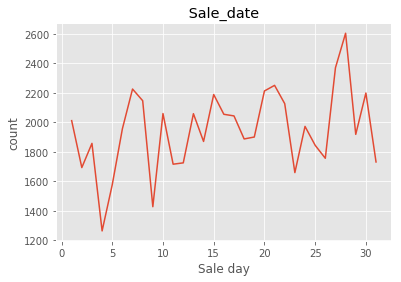

In [36]:
plt.title(r' Sale_date ')
plt.xlabel('Sale day')
plt.ylabel('count')
df['sale_day'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [37]:
df.sale_day.value_counts()

28    2603
27    2369
21    2250
7     2225
20    2212
30    2198
15    2188
8     2146
22    2126
10    2059
13    2058
16    2054
17    2043
1     2011
24    1972
6     1956
29    1918
19    1900
18    1887
14    1870
3     1857
25    1844
26    1756
31    1731
12    1725
11    1716
2     1693
23    1659
5     1577
9     1428
4     1264
Name: sale_day, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



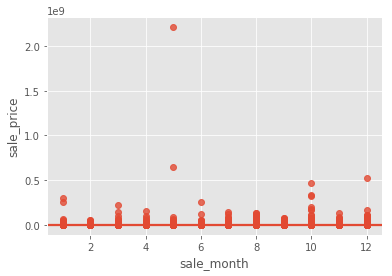

In [38]:
#scatter plot with land square feet and sale price
ydata = df.sale_price 
df.sale_month = df.sale_month.convert_objects(convert_numeric= True)
data1 = pd.concat((df.sale_month,ydata),axis=1)
sns.regplot(data1.sale_month,ydata,data=data1)
plt.savefig('24',dpi=300, bbox_inches = 'tight')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



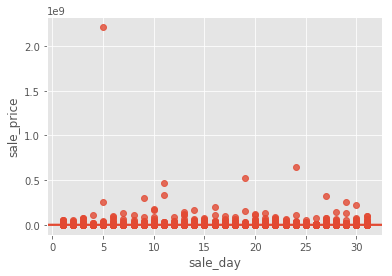

In [39]:
#scatter plot with land square feet and sale price
ydata = df.sale_price 
df.sale_day = df.sale_day.convert_objects(convert_numeric= True)
data1 = pd.concat((df.sale_day,ydata),axis=1)
sns.regplot(data1.sale_day,ydata,data=data1)
plt.savefig('25',dpi=300, bbox_inches = 'tight')

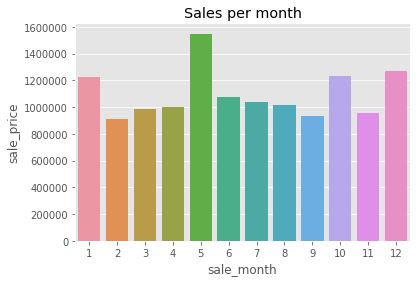

In [40]:
sns.barplot(y='sale_price', x='sale_month',data=df, ci=None)
plt.title('Sales per month')
plt.savefig('24',dpi=300, bbox_inches = 'tight')

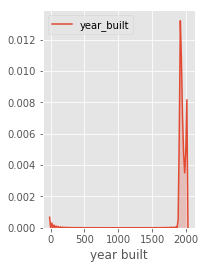

In [41]:
plt.subplot(121)
sns.kdeplot(df.year_built,shade=True)
plt.xlabel('year built')
plt.savefig('3',dpi=300, bbox_inches = 'tight')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



Text(0.5, 0, 'Log (Year built)')

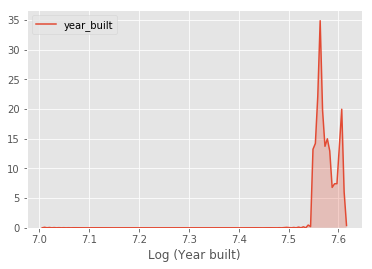

In [42]:

x = np.log(df.year_built)
sns.kdeplot(x,shade= True)
plt.xlabel('Log (Year built)')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



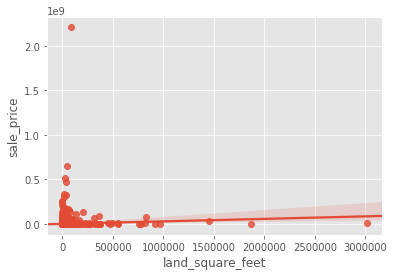

In [43]:
#scatter plot with land square feet and sale price
ydata = df.sale_price 
df.land_square_feet = df.land_square_feet.convert_objects(convert_numeric= True)
data1 = pd.concat((df.land_square_feet,ydata),axis=1)
sns.regplot(data1.land_square_feet,ydata,data=data1)
plt.savefig('16',dpi=300, bbox_inches = 'tight')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



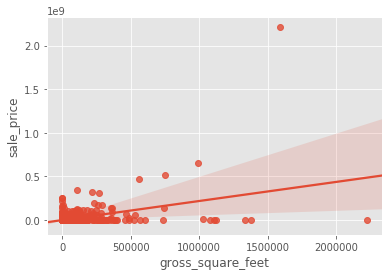

In [44]:
#scatter plot with land square feet and sale price
ydata = df.sale_price 
df.gross_square_feet = df.gross_square_feet.convert_objects(convert_numeric= True)
data1 = pd.concat((df.gross_square_feet,ydata),axis=1)
sns.regplot(data1.gross_square_feet,ydata,data=data1)
plt.savefig('17',dpi=300, bbox_inches = 'tight')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



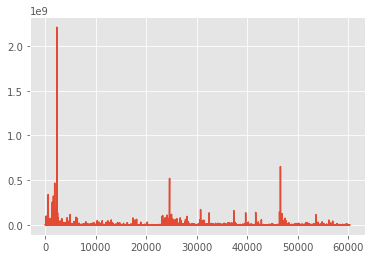

In [45]:
df.gross_square_feet=df.gross_square_feet.convert_objects(convert_numeric= True)
ydata=(df.sale_price ==0).sum()
data1 = df[df.sale_price > 21493.722932]
yd=df.sale_price

xdata=df.sale_price
data1
yd.plot()

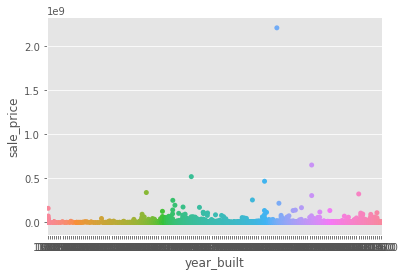

In [46]:
sns.stripplot(x='year_built',y ='sale_price',data=df)

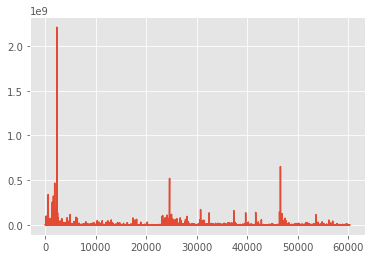

In [47]:
df.sale_price.plot.line()

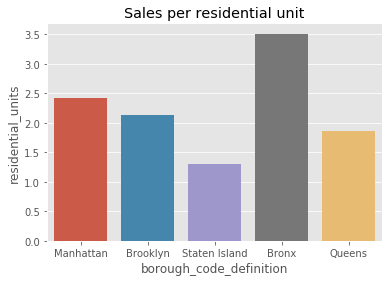

In [48]:
sns.barplot(y='residential_units', x='borough_code_definition',data=df, ci=None)
plt.title('Sales per residential unit')
plt.savefig('9',dpi=300, bbox_inches = 'tight')

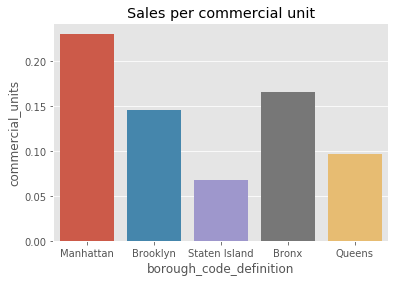

In [49]:
sns.barplot(y='commercial_units', x='borough_code_definition',data=df, ci=None)
plt.title('Sales per commercial unit')
plt.savefig('10',dpi=300, bbox_inches = 'tight')

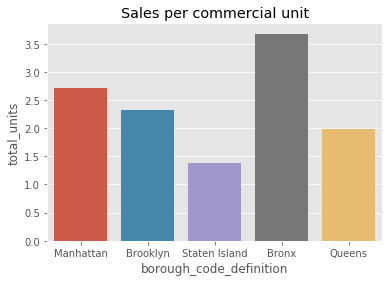

In [50]:
sns.barplot(y='total_units', x='borough_code_definition',data=df, ci=None)
plt.title('Sales per commercial unit')
plt.savefig('11',dpi=300, bbox_inches = 'tight')

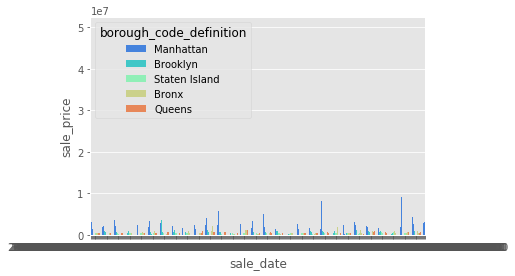

In [51]:
sns.barplot(x='sale_date', y='sale_price', hue='borough_code_definition', data=df, palette='rainbow', ci=None)

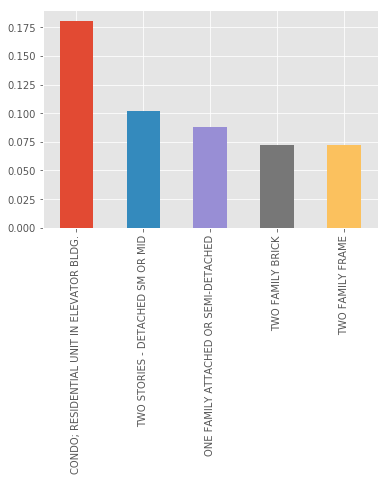

In [52]:
(df.building_class_at_time_of_sale_code_definition.value_counts().head() / len(df)).plot.bar()
plt.savefig('7',dpi=300, bbox_inches = 'tight')

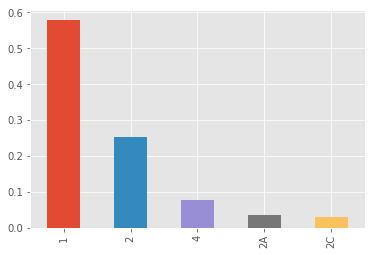

In [53]:
(df.tax_class_at_present_code.value_counts().head() / len(df)).plot.bar()
plt.savefig('8',dpi=300, bbox_inches = 'tight')

In [54]:
df.tax_class_at_present_code.describe()

count     60295
unique       12
top           1
freq      34780
Name: tax_class_at_present_code, dtype: object

In [55]:
df.zipcode.value_counts()

10314    1310
11354    1262
10312    1023
10306     978
11234     952
11235     907
11229     819
11201     814
11215     803
11238     717
11385     686
11236     655
11207     653
11208     642
10023     631
11221     625
11355     622
11204     615
10469     613
10305     607
10019     607
11434     605
11219     582
11211     579
11203     566
10025     559
11223     559
10011     558
10022     557
10304     554
         ... 
10468      94
10454      87
10035      85
10452      81
10030      80
11363      80
10464      78
10474      70
10033      70
10037      68
11001      67
10032      65
10451      65
10039      61
10018      51
10004      51
11239      36
10475      36
10034      36
10040      31
11040      30
10044      19
0          16
10282      12
11109       9
11697       7
10105       1
10167       1
11005       1
11241       1
Name: zipcode, Length: 185, dtype: int64

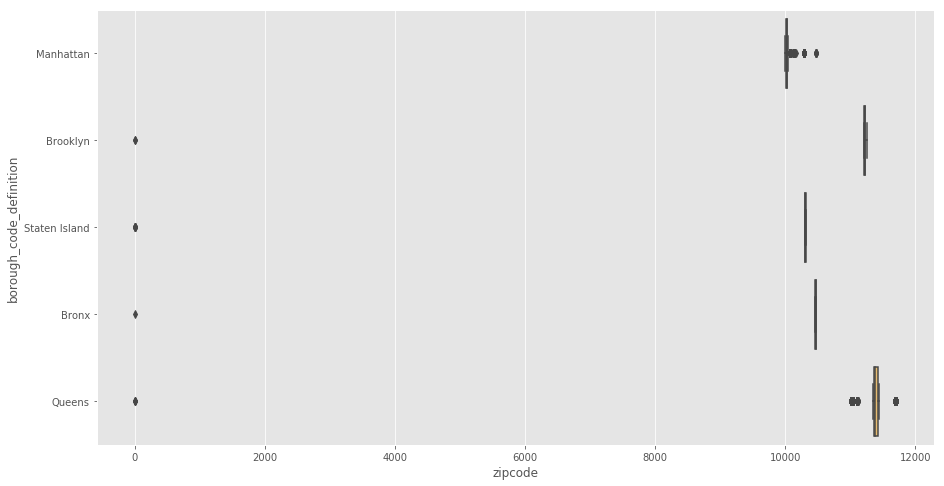

In [56]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.boxplot(x='zipcode', y='borough_code_definition', data=df, ax=ax)
plt.savefig('6',dpi=300, bbox_inches = 'tight')

In [57]:
df.zipcode.value_counts()

10314    1310
11354    1262
10312    1023
10306     978
11234     952
11235     907
11229     819
11201     814
11215     803
11238     717
11385     686
11236     655
11207     653
11208     642
10023     631
11221     625
11355     622
11204     615
10469     613
10305     607
10019     607
11434     605
11219     582
11211     579
11203     566
10025     559
11223     559
10011     558
10022     557
10304     554
         ... 
10468      94
10454      87
10035      85
10452      81
10030      80
11363      80
10464      78
10474      70
10033      70
10037      68
11001      67
10032      65
10451      65
10039      61
10018      51
10004      51
11239      36
10475      36
10034      36
10040      31
11040      30
10044      19
0          16
10282      12
11109       9
11697       7
10105       1
10167       1
11005       1
11241       1
Name: zipcode, Length: 185, dtype: int64

In [58]:
df.residential_units.value_counts()

1.0      29816
2.0      14451
0.0       8495
3.0       4029
4.0       1102
6.0        645
8.0        269
5.0        243
7.0        115
10.0       103
16.0        85
20.0        73
9.0         72
12.0        55
11.0        35
15.0        33
24.0        32
18.0        31
21.0        29
17.0        28
30.0        25
22.0        24
13.0        22
27.0        18
25.0        17
14.0        16
19.0        16
28.0        16
48.0        15
42.0        15
         ...  
159.0        1
86.0         1
430.0        1
335.0        1
162.0        1
222.0        1
180.0        1
114.0        1
129.0        1
148.0        1
150.0        1
72.0         1
115.0        1
182.0        1
361.0        1
75.0         1
131.0        1
76.0         1
92.0         1
139.0        1
278.0        1
318.0        1
132.0        1
149.0        1
83.0         1
66.0         1
917.0        1
109.0        1
126.0        1
145.0        1
Name: residential_units, Length: 152, dtype: int64

In [59]:
df.residential_units.describe()

count    60295.000000
mean         2.113641
std          9.679747
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        917.000000
Name: residential_units, dtype: float64

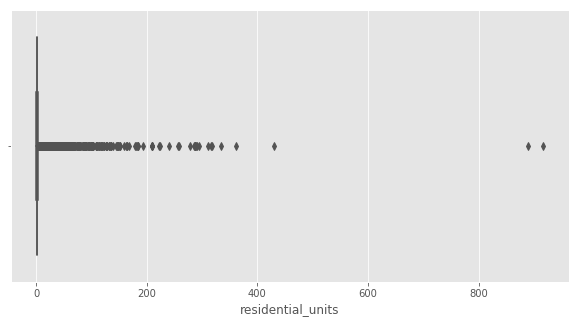

In [60]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.boxplot(x='residential_units', data=df, ax=ax)

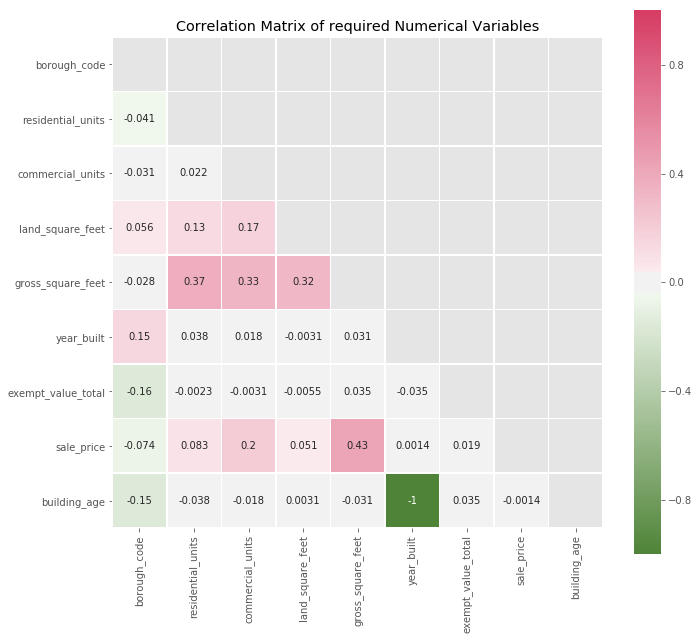

In [61]:
corr_mat= df[['zipcode',
              'borough_code',
              'neighborhood',
              'residential_units',
              'commercial_units',
              'land_square_feet', 
              'gross_square_feet', 
              'year_built',
              'exempt_value_total',
              'sale_price',
              'building_age']]
corr = corr_mat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            square=True, 
            linewidths=.5, 
            annot=True, 
            cmap=sns.diverging_palette(120, 2, as_cmap=True))

plt.yticks(rotation=0)
plt.title('Correlation Matrix of required Numerical Variables')
plt.show()

In [62]:
df.borough_code_definition.describe()

count        60295
unique           5
top       Brooklyn
freq         18966
Name: borough_code_definition, dtype: object

In [63]:
df.borough_code.describe()

count    60295.000000
mean         3.125682
std          1.237895
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: borough_code, dtype: float64

In [64]:
df[df['total_units'] == df['commercial_units'] + df['residential_units']]

,borough_code,borough_code_definition,neighborhood,building_class_category_code,building_class_category_code_definition,tax_class_at_present_code,tax_class_at_present_code_definition,building_class_at_present_code,building_class_at_present_code_definition,address,...,historical_district_name,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate,building_age,sale_year,sale_month,sale_day
0,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C4,OLD LAW TENEMENT,738 EAST 6 STREET,...,0,4.00,0.0,4.0,990363.0,202588.0,117.0,2017,4,3
1,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,27 AVENUE C,...,0,4.00,0.0,4.0,989508.0,202158.0,107.0,2017,7,11
2,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2A,Includes all other property that is primarily ...,C2,FIVE TO SIX FAMILIES,151 AVENUE B,...,0,4.00,0.0,4.0,989831.0,203960.0,117.0,2017,6,16
3,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2A,Includes all other property that is primarily ...,C2,FIVE TO SIX FAMILIES,153 AVENUE B,...,0,4.00,0.0,4.0,989833.0,203986.0,117.0,2017,7,19
4,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,193 EAST 4 STREET,...,0,3.00,0.0,3.0,988623.0,203137.0,117.0,2017,11,13
5,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C4,OLD LAW TENEMENT,516 EAST 12 STREET,...,0,4.00,0.0,4.0,989648.0,204688.0,117.0,2017,7,20
6,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,520 EAST 14 STREET,...,0,4.00,2.0,4.0,989961.0,205123.0,117.0,2017,7,20
7,1,Manhattan,ALPHABET CITY,8,RENTALS - ELEVATOR APARTMENTS,2,Includes all other property that is primarily ...,D5,ELEVATOR APT; CONVERTED,141 AVENUE D,...,0,6.00,0.0,6.0,991005.0,203306.0,97.0,2017,6,20
8,1,Manhattan,ALPHABET CITY,8,RENTALS - ELEVATOR APARTMENTS,2,Includes all other property that is primarily ...,D7,ELEVATOR APT; SEMI-FIREPROOF WITH STORES,181 AVENUE C,...,0,4.00,0.0,4.0,990550.0,204037.0,107.0,2017,7,20
9,1,Manhattan,ALPHABET CITY,9,COOPS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C6,WALK-UP COOPERATIVE,327 EAST 3 STREET,...,0,6.00,0.0,6.0,990231.0,201918.0,97.0,2017,3,10


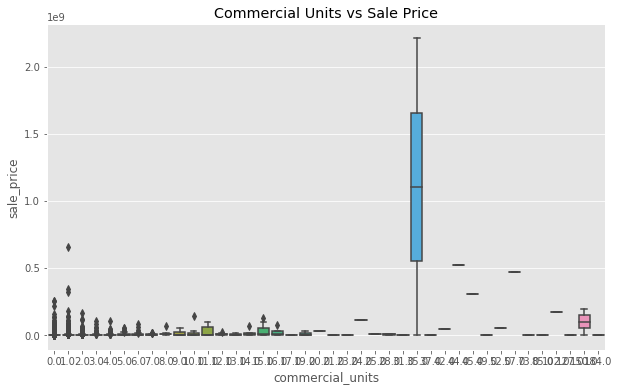

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y='sale_price', data=df)
plt.title('Commercial Units vs Sale Price')
plt.savefig('10',dpi=300, bbox_inches = 'tight')
plt.show()

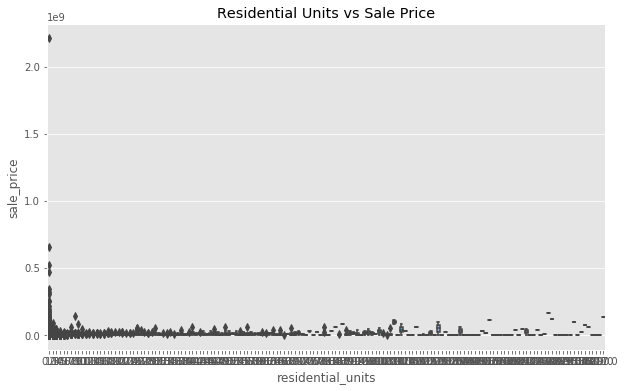

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='residential_units', y='sale_price', data=df)
plt.title('Residential Units vs Sale Price')
plt.savefig('11',dpi=300, bbox_inches = 'tight')
plt.show()

In [67]:
df.residential_units.describe()

count    60295.000000
mean         2.113641
std          9.679747
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        917.000000
Name: residential_units, dtype: float64

In [68]:
df.commercial_units.describe()

count    60295.000000
mean         0.136695
std          1.651642
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        184.000000
Name: commercial_units, dtype: float64

In [69]:
df.exempt_value_total.describe()

count    6.029500e+04
mean     1.047516e+06
std      6.838430e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.550000e+03
75%      1.628650e+04
max      4.033876e+08
Name: exempt_value_total, dtype: float64

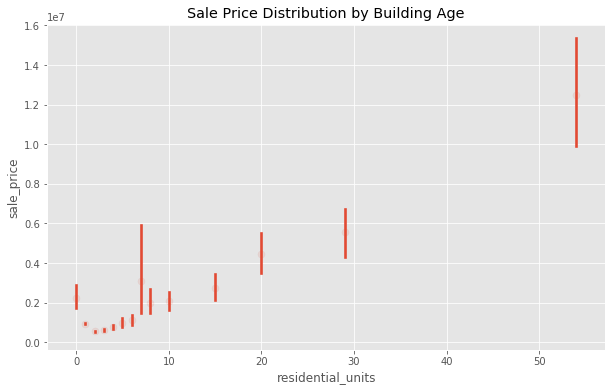

In [70]:
plt.figure(figsize=(10,6))
sns.regplot(x='residential_units', y='sale_price',x_bins=300, data=df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.savefig('14',dpi=300, bbox_inches = 'tight')
plt.show()

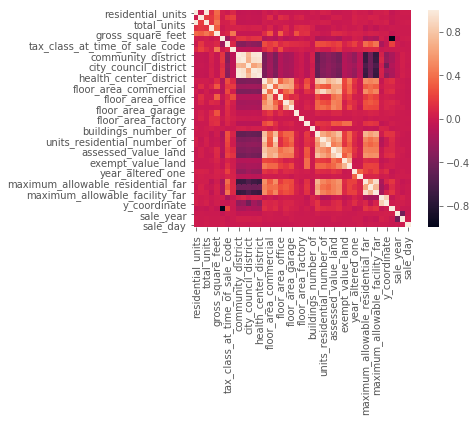

In [71]:
# correlation weith numerical valuable
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.heatmap(corr,vmax=1,square= True)

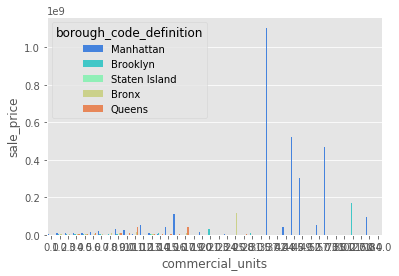

In [72]:
sns.barplot(x='commercial_units', y='sale_price', hue='borough_code_definition', data=df, palette='rainbow', ci=None)
plt.savefig('15',dpi=300, bbox_inches = 'tight')

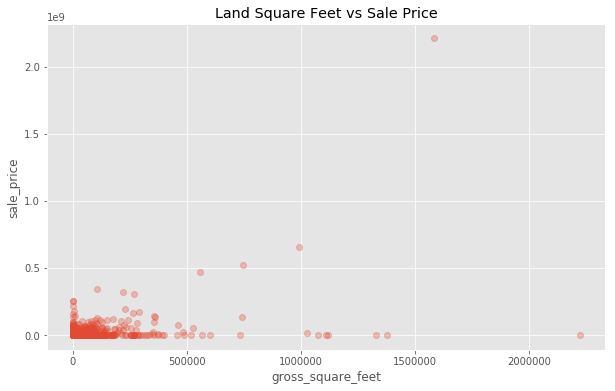

In [73]:
plt.figure(figsize=(10,6))
sns.regplot(x='gross_square_feet', y='sale_price', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [74]:
df.building_class_category_code_definition.value_counts()

ONE FAMILY DWELLINGS                       16613
TWO FAMILY DWELLINGS                       14191
CONDOS - ELEVATOR APARTMENTS               10902
THREE FAMILY DWELLINGS                      3844
RENTALS - WALKUP APARTMENTS                 2780
COOPS - ELEVATOR APARTMENTS                 2312
CONDO PARKING                               1203
CONDOS - 2-10 UNIT RESIDENTIAL              1190
COOPS - WALKUP APARTMENTS                    874
STORE BUILDINGS                              721
TAX CLASS 1 VACANT LAND                      634
TAX CLASS 1 CONDOS                           557
RENTALS - 4-10 UNIT                          553
CONDOS - WALKUP APARTMENTS                   473
COMMERCIAL GARAGES                           427
CONDO OFFICE BUILDINGS                       371
CONDO NON-BUSINESS STORAGE                   338
RENTALS - ELEVATOR APARTMENTS                291
WAREHOUSES                                   286
COMMERCIAL VACANT LAND                       245
OFFICE BUILDINGS    

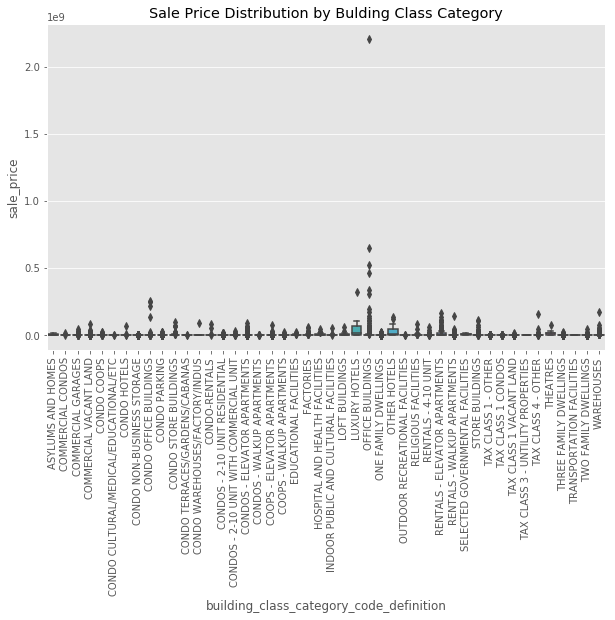

In [75]:
plt.figure(figsize=(10,6))
order = sorted(df.building_class_category_code_definition.unique())
sns.boxplot(x='building_class_category_code_definition', y='sale_price', data=df, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

# ----------------------------------------------------------

In [76]:
df.sale_price.mean()

1097607.9484866075

In [77]:
df.sale_price.median() # $1 million  ($644,000)   for Jan-Dec 2017

482000.0

In [78]:
df['Above_Below_median'] = np.where((df['sale_price'] > df['sale_price'].median()), "1", "0")

In [79]:
A_B = df[['borough_code_definition','sale_price', 'Above_Below_median','sale_month']]

In [80]:
A_B.sale_month.mode()

0    8
dtype: int64

In [81]:
A_B.Above_Below_median.value_counts()

0    30154
1    30141
Name: Above_Below_median, dtype: int64

In [82]:
A_B.mode()

,borough_code_definition,sale_price,Above_Below_median,sale_month
0,Brooklyn,0.0,0,8


In [83]:
A_B.borough_code_definition.value_counts()

Brooklyn         18966
Queens           18841
Manhattan        10198
Staten Island     7141
Bronx             5149
Name: borough_code_definition, dtype: int64

In [84]:
A_B.sale_month.value_counts(ascending=False)

8     5917
6     5871
3     5697
5     5378
10    5276
12    4898
11    4827
9     4791
2     4773
7     4744
4     4642
1     3481
Name: sale_month, dtype: int64

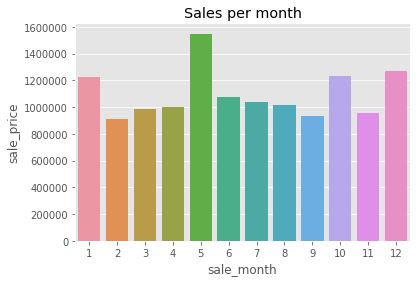

In [85]:
sns.barplot(y='sale_price', x='sale_month',data=A_B, ci=None)
plt.title('Sales per month')
plt.savefig('24',dpi=300, bbox_inches = 'tight')

# __________________________________________________MANHATTAN__________________________________________________________

In [86]:
Mhttan = df.loc[df['borough_code_definition'] == 'Manhattan']

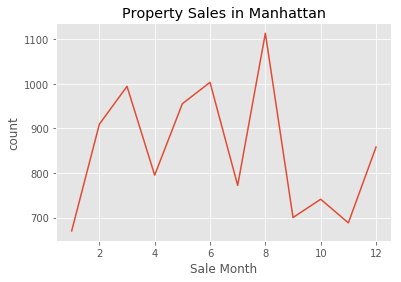

In [87]:
plt.title(r'Property Sales in Manhattan')
plt.xlabel('Sale Month')
plt.ylabel('count')
Mhttan['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [88]:
Mhttan.sale_price.median()  

999999.0

# __________________________________________________ BROOKLYN__________________________________________________________

In [89]:
Bklyn = df.loc[df['borough_code_definition'] == 'Brooklyn']

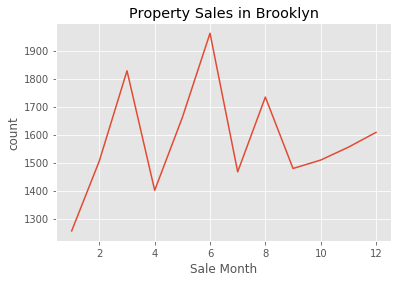

In [90]:
plt.title(r'Property Sales in Brooklyn')
plt.xlabel('Sale Month')
plt.ylabel('count')
Bklyn['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [91]:
Bklyn.sale_price.median() 

515833.5

# __________________________________________________ QUEENS__________________________________________________________

In [92]:
Qn = df.loc[df['borough_code_definition'] == 'Queens']

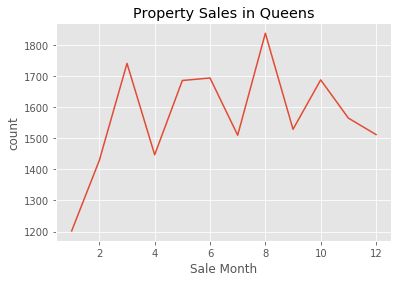

In [93]:
plt.title(r'Property Sales in Queens')
plt.xlabel('Sale Month')
plt.ylabel('count')
Qn['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [94]:
Qn.sale_price.median()  

441090.0

# __________________________________________________ BRONX__________________________________________________________

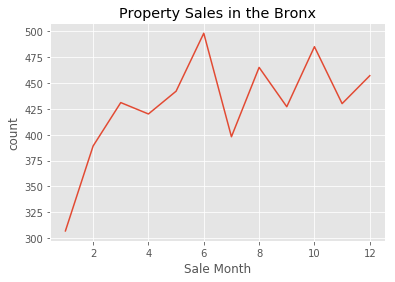

In [95]:
Bx = df.loc[df['borough_code_definition'] == 'Bronx']

plt.title(r'Property Sales in the Bronx')
plt.xlabel('Sale Month')
plt.ylabel('count')
Bx['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [96]:
Bx.sale_price.median() 

392000.0

# ______STATEN ISLAND__________________________________________________________

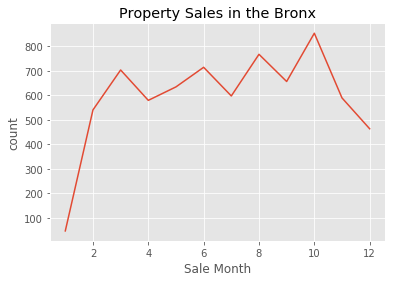

In [97]:
SI = df.loc[df['borough_code_definition'] == 'Staten Island']

plt.title(r'Property Sales in the Bronx')
plt.xlabel('Sale Month')
plt.ylabel('count')
SI['sale_month'].value_counts().sort_index().plot.line()
plt.savefig('23',dpi=300, bbox_inches = 'tight')

In [98]:
SI.sale_price.median() 

404000.0

In [99]:
df

,borough_code,borough_code_definition,neighborhood,building_class_category_code,building_class_category_code_definition,tax_class_at_present_code,tax_class_at_present_code_definition,building_class_at_present_code,building_class_at_present_code_definition,address,...,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate,building_age,sale_year,sale_month,sale_day,Above_Below_median
0,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C4,OLD LAW TENEMENT,738 EAST 6 STREET,...,4.00,0.0,4.0,990363.0,202588.0,117.0,2017,4,3,1
1,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,27 AVENUE C,...,4.00,0.0,4.0,989508.0,202158.0,107.0,2017,7,11,1
2,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2A,Includes all other property that is primarily ...,C2,FIVE TO SIX FAMILIES,151 AVENUE B,...,4.00,0.0,4.0,989831.0,203960.0,117.0,2017,6,16,0
3,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2A,Includes all other property that is primarily ...,C2,FIVE TO SIX FAMILIES,153 AVENUE B,...,4.00,0.0,4.0,989833.0,203986.0,117.0,2017,7,19,1
4,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,193 EAST 4 STREET,...,3.00,0.0,3.0,988623.0,203137.0,117.0,2017,11,13,1
5,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C4,OLD LAW TENEMENT,516 EAST 12 STREET,...,4.00,0.0,4.0,989648.0,204688.0,117.0,2017,7,20,0
6,1,Manhattan,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C7,WALK-UP APT. OVER SIX FAMILIES WITH STORES,520 EAST 14 STREET,...,4.00,2.0,4.0,989961.0,205123.0,117.0,2017,7,20,0
7,1,Manhattan,ALPHABET CITY,8,RENTALS - ELEVATOR APARTMENTS,2,Includes all other property that is primarily ...,D5,ELEVATOR APT; CONVERTED,141 AVENUE D,...,6.00,0.0,6.0,991005.0,203306.0,97.0,2017,6,20,0
8,1,Manhattan,ALPHABET CITY,8,RENTALS - ELEVATOR APARTMENTS,2,Includes all other property that is primarily ...,D7,ELEVATOR APT; SEMI-FIREPROOF WITH STORES,181 AVENUE C,...,4.00,0.0,4.0,990550.0,204037.0,107.0,2017,7,20,0
9,1,Manhattan,ALPHABET CITY,9,COOPS - WALKUP APARTMENTS,2,Includes all other property that is primarily ...,C6,WALK-UP COOPERATIVE,327 EAST 3 STREET,...,6.00,0.0,6.0,990231.0,201918.0,97.0,2017,3,10,1


In [100]:
#Making columns that were objects/Strings into categorical columns

df['Borough'] = df['borough_code_definition'].astype('category')
df["Borough"] = df["Borough"].cat.codes

df['Neighborhood'] = df['neighborhood'].astype('category')
df["Neighborhood"] = df["Neighborhood"].cat.codes


df['Building_class_category'] = df['building_class_category_code_definition'].astype('category')
df["Building_class_category"] = df["Building_class_category"].cat.codes


df['Tax_class_at_present'] = df['tax_class_at_present_code_definition'].astype('category')
df["Tax_class_at_present"] = df["Tax_class_at_present"].cat.codes


df['Building_class_at_present'] = df['building_class_at_present_code_definition'].astype('category')
df["Building_class_at_present"] = df["Building_class_at_present"].cat.codes


df['Community_district'] = df['community_district_definition'].astype('category')
df["Community_district"] = df["Community_district"].cat.codes


df['School_district'] = df['school_district_definition'].astype('category')
df["School_district"] = df["School_district"].cat.codes


df['City_council_district'] = df['city_council_district_definition'].astype('category')
df["City_council_district"] = df["City_council_district"].cat.codes


df['Fire_company'] = df['fire_company_definition'].astype('category')
df["Fire_company"] = df["Fire_company"].cat.codes


df['Police_precinct'] = df['police_precinct_definition'].astype('category')
df["Police_precinct"] = df["Police_precinct"].cat.codes


df['Health_center_district'] = df['health_center_district'].astype('category')
df["Health_center_district"] = df["Health_center_district"].cat.codes


df['Owner_type'] = df['owner_type_definition'].astype('category')
df["Owner_type"] = df["Owner_type"].cat.codes

df['Above_Below_median'] = df['Above_Below_median'].astype('int')

df['Year_built'] = df['year_built'].astype('str')
df['Year_altered_one'] = df['year_altered_one'].astype('str')
df['Year_altered_two'] = df['year_altered_two'].astype('str')

df['sale_day'] = df['sale_day'].astype('str')
df['sale_month'] = df['sale_month'].astype('str')
df['sale_year'] = df['sale_year'].astype('str')

drop_columns = ['borough_code','building_class_category_code','borough_code_definition','tax_class_at_present_code',
                'neighborhood','building_class_category_code_definition','tax_class_at_present_code_definition',
                'year_built','community_district_definition','school_district_definition','city_council_district_definition',
                'fire_company_definition','police_precinct_definition','health_center_district','owner_type_definition',
                'year_altered_one','year_altered_two','building_class_at_present_code_definition','building_class_at_present_code',
                 'community_district','school_district','city_council_district',
                'x_coordinate','y_coordinate','maximum_allowable_facility_far','maximum_allowable_commercial_far',
                'maximum_allowable_residential_far','historical_district_name','owner_type','owner_type_definition',
                'fire_company','fire_company_definition','tax_class_at_time_of_sale_code','tax_class_at_time_of_sale_code_definition',
                'building_class_at_time_of_sale_code','building_class_at_time_of_sale_code_definition','address','apartment_number',
                'zipcode','sale_date','police_precinct']

new_df = df.drop(drop_columns, axis=1)

In [101]:
new_df.dtypes

residential_units              float64
commercial_units               float64
total_units                    float64
land_square_feet               float64
gross_square_feet              float64
sale_price                     float64
floor_area_total_building      float64
floor_area_commercial          float64
floor_area_residential         float64
floor_area_office              float64
floor_area_retail              float64
floor_area_garage              float64
floor_area_storage             float64
floor_area_factory             float64
floor_area_other               float64
buildings_number_of            float64
floors_number_of               float64
units_residential_number_of      int64
units_total_number_of            int64
assessed_value_land            float64
assessed_value_total           float64
exempt_value_land              float64
exempt_value_total             float64
building_age                   float64
sale_year                       object
sale_month               

In [102]:
new_df

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price,floor_area_total_building,floor_area_commercial,floor_area_residential,floor_area_office,...,Community_district,School_district,City_council_district,Fire_company,Police_precinct,Health_center_district,Owner_type,Year_built,Year_altered_one,Year_altered_two
0,11.0,0.0,11.0,1750.0,6500.0,3750000.0,6500.0,0.0,6500.0,0.0,...,18,3,3,1,8,4,5,1900.0,0.0,0.0
1,24.0,1.0,25.0,2650.0,9960.0,5235000.0,9960.0,400.0,9560.0,0.0,...,18,3,3,1,8,4,5,1910.0,0.0,0.0
2,5.0,0.0,5.0,2139.0,4416.0,0.0,4416.0,0.0,4416.0,0.0,...,18,3,3,2,8,4,0,1900.0,0.0,0.0
3,5.0,0.0,5.0,1633.0,6440.0,6625000.0,6440.0,0.0,6440.0,0.0,...,18,3,3,2,8,4,0,1900.0,1984.0,0.0
4,11.0,1.0,12.0,2388.0,8045.0,7675000.0,8045.0,500.0,7545.0,0.0,...,18,3,3,1,8,4,0,1900.0,0.0,0.0
5,20.0,0.0,20.0,2581.0,9730.0,0.0,9730.0,0.0,9730.0,0.0,...,18,3,3,2,8,4,5,1900.0,0.0,0.0
6,44.0,2.0,46.0,5163.0,21007.0,0.0,21007.0,2000.0,19007.0,0.0,...,18,3,3,2,8,4,5,1900.0,2008.0,1986.0
7,15.0,0.0,15.0,5626.0,21957.0,0.0,9198.0,0.0,9198.0,0.0,...,18,3,3,2,8,4,5,1920.0,1998.0,0.0
8,30.0,4.0,34.0,4295.0,21328.0,0.0,21328.0,2000.0,19328.0,0.0,...,18,3,3,2,8,4,5,1910.0,2011.0,2010.0
9,0.0,0.0,0.0,0.0,0.0,499000.0,17610.0,1200.0,16410.0,0.0,...,18,3,3,1,8,4,5,1920.0,1981.0,0.0


In [103]:
#Creating a new dataset with only the columns that will be needed for Part 2 of the assignment
NewYork_RentalSales = pd.DataFrame(new_df[['Year_built',
                                 'Borough',
                                 'Neighborhood',
                                 'Building_class_category',
                                 'Building_class_at_present',
                                 'Tax_class_at_present',
                                 'Community_district',
                                 'School_district',
                                 'City_council_district',
                                 'Fire_company',
                                 'Health_center_district',
                                 'Owner_type',
                                 'Year_altered_one',
                                 'Year_altered_two',
                                 'residential_units',               
                                 'commercial_units',                
                                 'total_units',                     
                                 'land_square_feet',           
                                 'gross_square_feet',               
                                 'sale_price',                      
                                 'Police_precinct',                 
                                 'floor_area_total_building',       
                                 'floor_area_commercial',           
                                 'floor_area_residential',          
                                 'floor_area_office',               
                                 'floor_area_retail',               
                                 'floor_area_garage',               
                                 'floor_area_storage',              
                                 'floor_area_factory',              
                                 'floor_area_other',                
                                 'buildings_number_of',             
                                 'floors_number_of',                
                                 'units_residential_number_of',       
                                 'units_total_number_of',             
                                 'assessed_value_land',             
                                 'assessed_value_total',            
                                 'exempt_value_land',               
                                 'exempt_value_total',              
                                 'building_age',                    
                                 'sale_year',                        
                                 'sale_month',                       
                                 'sale_day',
                                 'Above_Below_median']])
NewYork_RentalSales

,Year_built,Borough,Neighborhood,Building_class_category,Building_class_at_present,Tax_class_at_present,Community_district,School_district,City_council_district,Fire_company,...,units_total_number_of,assessed_value_land,assessed_value_total,exempt_value_land,exempt_value_total,building_age,sale_year,sale_month,sale_day,Above_Below_median
0,1900.0,2,1,33,112,2,18,3,3,1,...,11,269100.0,645750.0,0.0,0.0,117.0,2017,4,3,1
1,1910.0,2,1,33,157,2,18,3,3,1,...,25,225000.0,1148400.0,0.0,0.0,107.0,2017,7,11,1
2,1900.0,2,1,33,50,4,18,3,3,2,...,5,14934.0,98490.0,0.0,0.0,117.0,2017,6,16,0
3,1900.0,2,1,33,50,4,18,3,3,2,...,5,14793.0,93828.0,0.0,0.0,117.0,2017,7,19,1
4,1900.0,2,1,33,157,2,18,3,3,1,...,12,225000.0,1262700.0,0.0,0.0,117.0,2017,11,13,1
5,1900.0,2,1,33,112,2,18,3,3,2,...,20,294300.0,1948950.0,0.0,0.0,117.0,2017,7,20,0
6,1900.0,2,1,33,157,2,18,3,3,2,...,46,348300.0,3444300.0,0.0,0.0,117.0,2017,7,20,0
7,1920.0,2,1,32,32,2,18,3,3,2,...,15,207000.0,999000.0,207000.0,999000.0,97.0,2017,6,20,0
8,1910.0,2,1,32,37,2,18,3,3,2,...,34,196650.0,3654900.0,0.0,0.0,107.0,2017,7,20,0
9,1920.0,2,1,19,159,2,18,3,3,1,...,29,270000.0,760950.0,270000.0,425505.0,97.0,2017,3,10,1


In [104]:
cols=[i for i in NewYork_RentalSales.columns if i not in ["Above_Below_median"]]
for col in cols:
    NewYork_RentalSales[col]=pd.to_numeric(NewYork_RentalSales[col])

In [105]:
cdf = NewYork_RentalSales.copy()

In [106]:
#Centering all columns except the predictor column (the last column)
for feature_name in NewYork_RentalSales.columns[0:-1]:
    mean_ = NewYork_RentalSales[feature_name].mean()
    sd_   = NewYork_RentalSales[feature_name].std()
    cdf[feature_name] = (NewYork_RentalSales[feature_name] - mean_) / (sd_)
cdf.head(10)

,Year_built,Borough,Neighborhood,Building_class_category,Building_class_at_present,Tax_class_at_present,Community_district,School_district,City_council_district,Fire_company,...,units_total_number_of,assessed_value_land,assessed_value_total,exempt_value_land,exempt_value_total,building_age,sale_year,sale_month,sale_day,Above_Below_median
0,0.157975,-0.053367,-1.655513,0.351520,0.204636,-1.232435,-0.692454,-0.059293,-0.076347,-0.852783,...,-0.228581,-0.162741,-0.249601,-0.085728,-0.153181,-0.157975,-0.247526,-0.786597,-1.516765,1
1,0.178757,-0.053367,-1.655513,0.351520,1.027907,-1.232435,-0.692454,-0.059293,-0.076347,-0.852783,...,-0.113916,-0.174575,-0.222764,-0.085728,-0.153181,-0.178757,-0.247526,0.114400,-0.615202,1
2,0.157975,-0.053367,-1.655513,0.351520,-0.929650,-0.552495,-0.692454,-0.059293,-0.076347,1.038369,...,-0.277723,-0.230943,-0.278820,-0.085728,-0.153181,-0.157975,-0.247526,-0.185932,-0.051725,0
3,0.157975,-0.053367,-1.655513,0.351520,-0.929650,-0.552495,-0.692454,-0.059293,-0.076347,1.038369,...,-0.277723,-0.230981,-0.279069,-0.085728,-0.153181,-0.157975,-0.247526,0.114400,0.286362,1
4,0.157975,-0.053367,-1.655513,0.351520,1.027907,-1.232435,-0.692454,-0.059293,-0.076347,-0.852783,...,-0.220390,-0.174575,-0.216661,-0.085728,-0.153181,-0.157975,-0.247526,1.315728,-0.389811,1
5,0.157975,-0.053367,-1.655513,0.351520,0.204636,-1.232435,-0.692454,-0.059293,-0.076347,1.038369,...,-0.154867,-0.155979,-0.180022,-0.085728,-0.153181,-0.157975,-0.247526,0.114400,0.399057,0
6,0.157975,-0.053367,-1.655513,0.351520,1.027907,-1.232435,-0.692454,-0.059293,-0.076347,1.038369,...,0.058082,-0.141489,-0.100183,-0.085728,-0.153181,-0.157975,-0.247526,0.114400,0.399057,0
7,0.199539,-0.053367,-1.655513,0.266058,-1.258958,-1.232435,-0.692454,-0.059293,-0.076347,1.038369,...,-0.195819,-0.179405,-0.230741,0.063127,-0.007095,-0.199539,-0.247526,-0.185932,0.399057,0
8,0.178757,-0.053367,-1.655513,0.266058,-1.167484,-1.232435,-0.692454,-0.059293,-0.076347,1.038369,...,-0.040203,-0.182182,-0.088939,-0.085728,-0.153181,-0.178757,-0.247526,0.114400,0.399057,0
9,0.199539,-0.053367,-1.655513,-0.844948,1.064497,-1.232435,-0.692454,-0.059293,-0.076347,-0.852783,...,-0.081154,-0.162500,-0.243451,0.108430,-0.090958,-0.199539,-0.247526,-1.086929,-0.727897,1


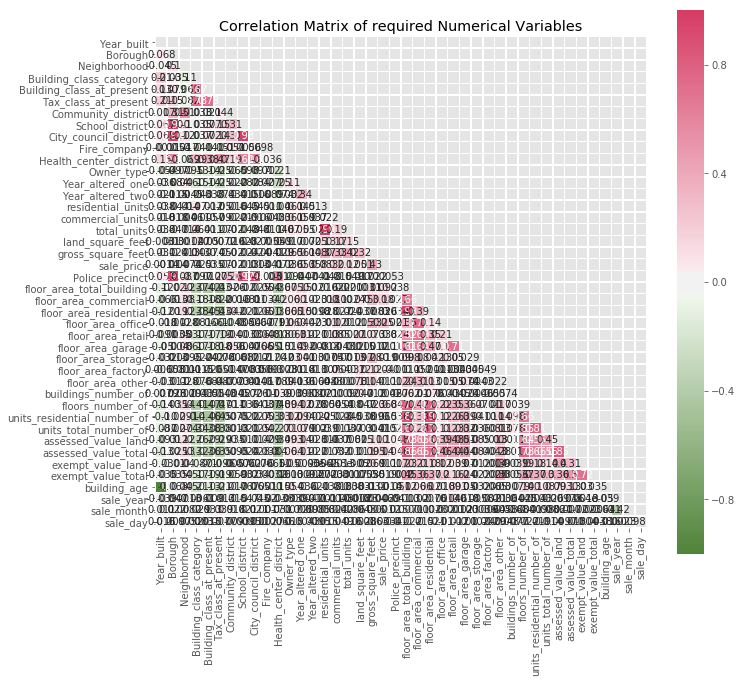

In [107]:
corr_mat= cdf[['Year_built',
                                 'Borough',
                                 'Neighborhood',
                                 'Building_class_category',
                                 'Building_class_at_present',
                                 'Tax_class_at_present',
                                 'Community_district',
                                 'School_district',
                                 'City_council_district',
                                 'Fire_company',
                                 'Health_center_district',
                                 'Owner_type',
                                 'Year_altered_one',
                                 'Year_altered_two',
                                 'residential_units',               
                                 'commercial_units',                
                                 'total_units',                     
                                 'land_square_feet',           
                                 'gross_square_feet',               
                                 'sale_price',                      
                                 'Police_precinct',                 
                                 'floor_area_total_building',       
                                 'floor_area_commercial',           
                                 'floor_area_residential',          
                                 'floor_area_office',               
                                 'floor_area_retail',               
                                 'floor_area_garage',               
                                 'floor_area_storage',              
                                 'floor_area_factory',              
                                 'floor_area_other',                
                                 'buildings_number_of',             
                                 'floors_number_of',                
                                 'units_residential_number_of',       
                                 'units_total_number_of',             
                                 'assessed_value_land',             
                                 'assessed_value_total',            
                                 'exempt_value_land',               
                                 'exempt_value_total',              
                                 'building_age',                    
                                 'sale_year',                        
                                 'sale_month',                       
                                 'sale_day',]]
corr = corr_mat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            square=True, 
            linewidths=.5, 
            annot=True, 
            cmap=sns.diverging_palette(120, 2, as_cmap=True))

plt.yticks(rotation=0)
plt.title('Correlation Matrix of required Numerical Variables')
plt.show()

In [117]:
a = cdf.groupby('Above_Below_median').mean()
a.transpose()

Above_Below_median,0,1
Year_built,-0.026548,0.026559
Borough,0.037803,-0.037819
Neighborhood,0.009981,-0.009985
Building_class_category,0.054407,-0.054431
Building_class_at_present,0.149233,-0.149297
Tax_class_at_present,0.094344,-0.094385
Community_district,0.057952,-0.057977
School_district,0.035942,-0.035957
City_council_district,0.034148,-0.034163
Fire_company,-0.010062,0.010066


In [108]:
cdf.to_csv('NewYork_RentalSales_MAIN.csv',index=False)

In [109]:
cdf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,60285,60286,60287,60288,60289,60290,60291,60292,60293,60294
Year_built,0.157975,0.178757,0.157975,0.157975,0.157975,0.157975,0.157975,0.199539,0.178757,0.199539,...,0.293057,0.378263,0.261884,0.261884,0.282666,0.272275,0.272275,0.376185,0.272275,0.272275
Borough,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,-0.053367,...,1.614293,1.614293,1.614293,1.614293,1.614293,1.614293,1.614293,1.614293,1.614293,1.614293
Neighborhood,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,-1.655513,...,1.597852,1.597852,1.597852,1.597852,1.597852,1.597852,1.597852,1.597852,1.597852,1.597852
Building_class_category,0.351520,0.351520,0.351520,0.351520,0.351520,0.351520,0.351520,0.266058,0.266058,-0.844948,...,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252,-0.161252
Building_class_at_present,0.204636,1.027907,-0.929650,-0.929650,1.027907,0.204636,1.027907,-1.258958,-1.167484,1.064497,...,0.991318,0.222931,0.241226,0.241226,0.991318,0.241226,1.174267,0.222931,0.241226,0.241226
Tax_class_at_present,-1.232435,-1.232435,-0.552495,-0.552495,-1.232435,-1.232435,-1.232435,-1.232435,-1.232435,-1.232435,...,0.807386,0.807386,0.807386,0.807386,0.807386,0.807386,1.147357,0.807386,0.807386,0.807386
Community_district,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,-0.692454,...,0.784252,0.784252,0.784252,0.784252,0.784252,0.784252,0.784252,0.784252,0.784252,0.784252
School_district,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,-0.059293,...,1.605461,1.605461,1.605461,1.605461,1.605461,1.605461,1.605461,1.605461,1.605461,1.605461
City_council_district,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,-0.076347,...,1.584609,1.584609,1.584609,1.584609,1.584609,1.584609,1.584609,1.584609,1.584609,1.584609
Fire_company,-0.852783,-0.852783,1.038369,1.038369,-0.852783,1.038369,1.038369,1.038369,1.038369,-0.852783,...,1.038369,1.038369,1.038369,1.038369,1.038369,-0.852783,-0.852783,-0.852783,-0.852783,-0.852783


In [110]:
cdf.columns

Index(['Year_built', 'Borough', 'Neighborhood', 'Building_class_category',
       'Building_class_at_present', 'Tax_class_at_present',
       'Community_district', 'School_district', 'City_council_district',
       'Fire_company', 'Health_center_district', 'Owner_type',
       'Year_altered_one', 'Year_altered_two', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'sale_price', 'Police_precinct',
       'floor_area_total_building', 'floor_area_commercial',
       'floor_area_residential', 'floor_area_office', 'floor_area_retail',
       'floor_area_garage', 'floor_area_storage', 'floor_area_factory',
       'floor_area_other', 'buildings_number_of', 'floors_number_of',
       'units_residential_number_of', 'units_total_number_of',
       'assessed_value_land', 'assessed_value_total', 'exempt_value_land',
       'exempt_value_total', 'building_age', 'sale_year', 'sale_month',
       'sale_day', 'Above_Below_median'],
      dt

In [111]:
cdf.shape

(60295, 43)

In [112]:
cdf.Above_Below_median.value_counts()

0    30154
1    30141
Name: Above_Below_median, dtype: int64